Math 5750/6880: Mathematics of Data Science \
Project 4

# 1. Exploratory Analysis

Use the following code to download the dataset from
[https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook](https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook). The dataset is described in the paper [https://doi.org/10.3389/fdgth.2022.1090854](https://doi.org/10.3389/fdgth.2022.1090854).

I would recommend saving the data files to a google drive (or your local machine) so that you don't have to download them again. Note that the 5 data files correspond to the 5 columns in Table 4 of the paper.


In [9]:
# download the data from kagglehub
# The dataset is 17.3 G
# This took about 15min using university wifi and, if
# you save the data, you should only have to do it once

import kagglehub
path = kagglehub.dataset_download("weinanwangrutgers/pulsedb-balanced-training-and-testing")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pulsedb-balanced-training-and-testing' dataset.
Path to dataset files: /kaggle/input/pulsedb-balanced-training-and-testing


In [10]:
# run this block to move the data to a permanent directory in your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"
!mkdir -p $DATA_DIR
!cp -r $path/* $DATA_DIR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# run this block after data is saved to your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"

mat_files = sorted(glob.glob(os.path.join(DATA_DIR, "**", "*.mat"), recursive=True))
print(f"Found {len(mat_files)} .mat files")
for f in mat_files:
    print(" -", f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5 .mat files
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Cal_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalFree_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_Train_Subset.mat


Now we'll load the data. The data is about 20GB, which exceeds the colab basic RAM allocation. You can check your RAM using

`!cat /proc/meminfo`

You should upgrade to colab pro, which is free for students.

[https://colab.research.google.com/signup](https://colab.research.google.com/signup)

Then in 'change runtime type' click A100 GPU and high RAM.

In [60]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute

!cat /proc/meminfo

!pip install mat73
import mat73
import pandas as pd
import numpy as np

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)['Subset']
    print('finished loading'+file_path)
    # print(data_dict.keys())

    # first handle Signals
    ECG = data_dict['Signals'][:,0,:]
    PPG = data_dict['Signals'][:,1,:]
    ABP = data_dict['Signals'][:,2,:]
    data_dict.pop("Signals", None)

    data_dict['Age'] = data_dict['Age'].tolist()
    data_dict['BMI'] = data_dict['BMI'].tolist()
    data_dict['DBP'] = data_dict['DBP'].tolist()
    data_dict['Gender'] = [1 if x[0] == 'M' else 0 for x in data_dict['Gender']]
    data_dict['Height'] = data_dict['Height'].tolist()
    data_dict['SBP'] = data_dict['SBP'].tolist()
    data_dict['Subject'] = [x[0] for x in data_dict['Subject']]
    data_dict['Weight'] = data_dict['Weight'].tolist()

    data_df = pd.DataFrame(data_dict)
    print('constructed df')

    return data_df, ECG, PPG, ABP

df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'VitalDB_CalBased_Test_Subset.mat')
df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'VitalDB_Train_Subset.mat')

MemTotal:       175166496 kB
MemFree:        53168304 kB
MemAvailable:   152638784 kB
Buffers:          214976 kB
Cached:         98239208 kB
SwapCached:            0 kB
Active:         28794792 kB
Inactive:       89826980 kB
Active(anon):       3484 kB
Inactive(anon): 20171584 kB
Active(file):   28791308 kB
Inactive(file): 69655396 kB
Unevictable:          20 kB
Mlocked:              20 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               344 kB
Writeback:             0 kB
AnonPages:      20106136 kB
Mapped:           562396 kB
Shmem:              7468 kB
KReclaimable:    2618992 kB
Slab:            2990884 kB
SReclaimable:    2618992 kB
SUnreclaim:       371892 kB
KernelStack:       10736 kB
PageTables:        52564 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    87583248 kB
Committed_AS:   25117000 kB
VmallocTotal:   34359738367 kB
VmallocUsed:      103552 kB
VmallocChunk:  

In [61]:
# df_CalBased_Test has 51720 entries
print(df_CalBased_Test.keys())
print(df_CalBased_Test.info())
print(df_CalBased_Test.describe())
df_CalBased_Test

Index(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51720 entries, 0 to 51719
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      51720 non-null  float64
 1   BMI      51720 non-null  float64
 2   DBP      51720 non-null  float64
 3   Gender   51720 non-null  int64  
 4   Height   51720 non-null  float64
 5   SBP      51720 non-null  float64
 6   Subject  51720 non-null  object 
 7   Weight   51720 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB
None
                Age           BMI           DBP        Gender        Height  \
count  51720.000000  51720.000000  51720.000000  51720.000000  51720.000000   
mean      58.980684     22.918826     62.936572      0.576953    162.502790   
std       15.032644      3.437789     12.070353      0.494048      9.641087   
min        0.400000     12.400000   

,Age,BMI,DBP,Gender,Height,SBP,Subject,Weight
0,48.0,20.7,68.482123,1,177.4,116.804871,p000001_1,65.0
1,48.0,20.7,66.047147,1,177.4,113.288819,p000001_1,65.0
2,48.0,20.7,66.378229,1,177.4,113.340180,p000001_1,65.0
3,48.0,20.7,59.910707,1,177.4,95.062698,p000001_1,65.0
4,48.0,20.7,89.850848,1,177.4,140.302555,p000001_1,65.0
...,...,...,...,...,...,...,...,...
51715,79.0,22.1,48.225986,1,169.6,109.266631,p006090_1,63.5
51716,79.0,22.1,48.607110,1,169.6,108.695099,p006090_1,63.5
51717,79.0,22.1,55.178004,1,169.6,110.514411,p006090_1,63.5
51718,79.0,22.1,47.861650,1,169.6,104.640197,p006090_1,63.5


In [62]:
# 1293 subjects, 40 samples/ subject = 51720 samples
df_CalBased_Test['Subject'].value_counts()

,count
Subject,
p006090_1,40
p000001_1,40
p000003_1,40
p000005_1,40
p000012_1,40
...,...
p000063_1,40
p000064_1,40
p000074_1,40


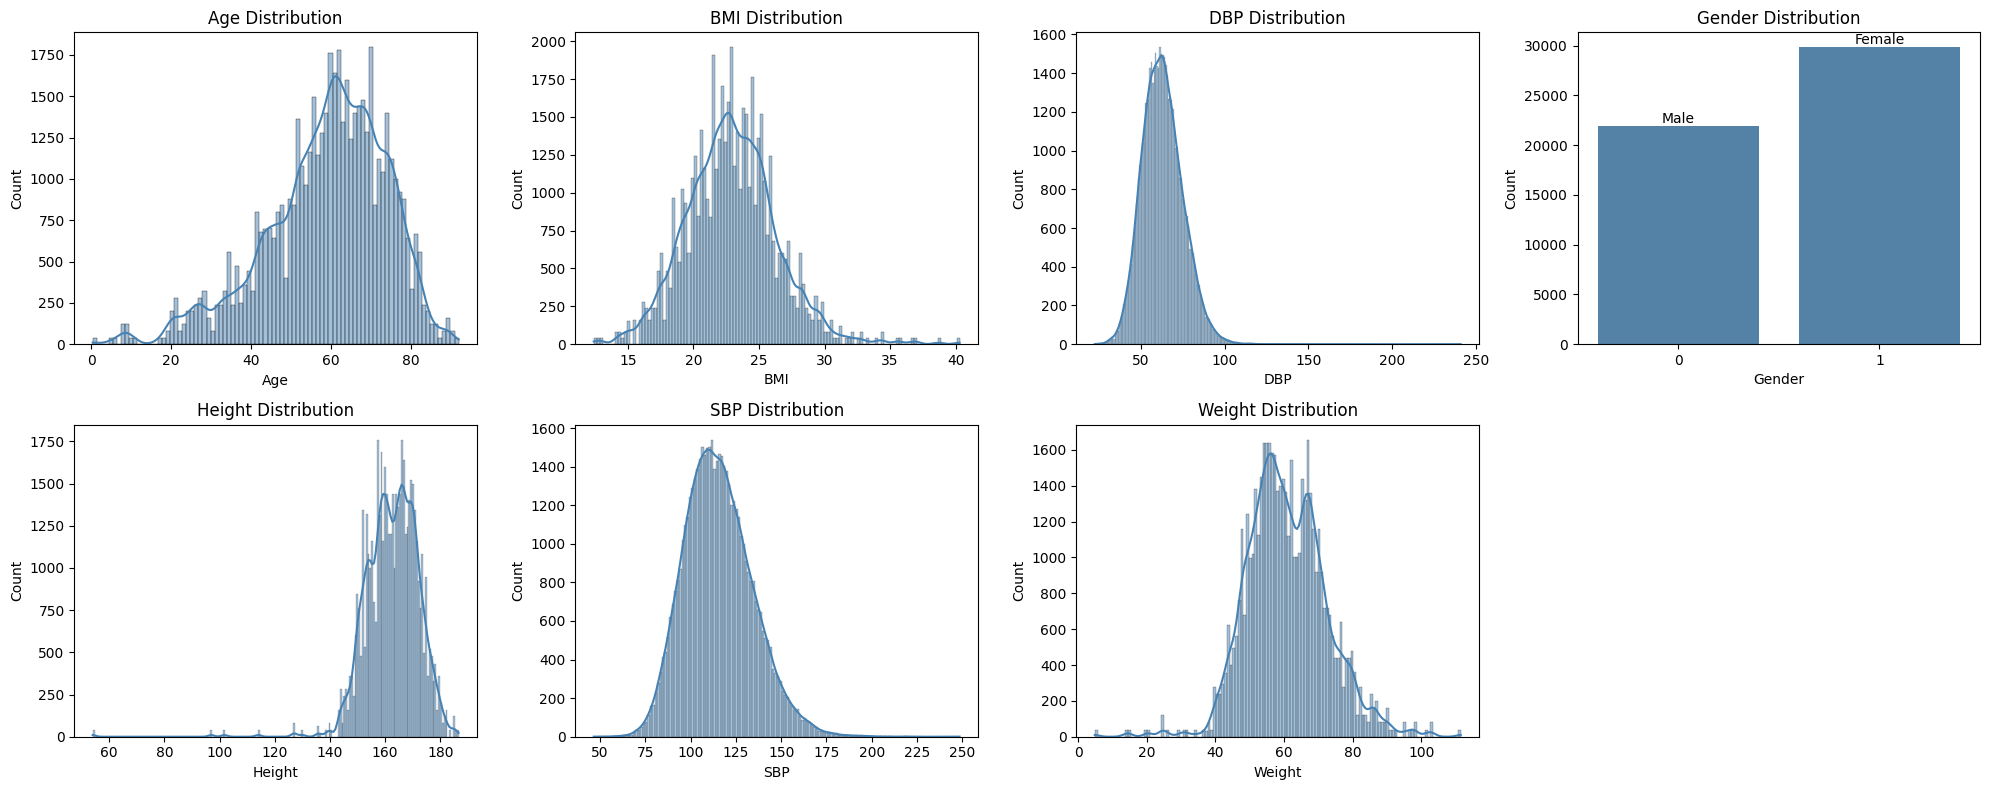

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df_CalBased_Test
df['Gender'].value_counts(dropna=False)


fig, ax = plt.subplots(2, 4, figsize=(20, 8))

sns.histplot(df['Age'], kde=True, color='steelblue', ax=ax[0, 0])
ax[0, 0].set_title("Age Distribution")
ax[0, 0].set_xlabel("Age")
ax[0, 0].set_ylabel("Count")

sns.histplot(df['BMI'], kde=True, color='steelblue', ax=ax[0, 1])
ax[0, 1].set_title("BMI Distribution")
ax[0, 1].set_xlabel("BMI")
ax[0, 1].set_ylabel("Count")

sns.histplot(df['DBP'], kde=True, color='steelblue', ax=ax[0, 2])
ax[0, 2].set_title("DBP Distribution")
ax[0, 2].set_xlabel("DBP")
ax[0, 2].set_ylabel("Count")

sns.countplot(data=df, x='Gender', color='steelblue', ax=ax[0, 3])
ax[0, 3].set_title("Gender Distribution")
ax[0, 3].set_xlabel("Gender")
ax[0, 3].set_ylabel("Count")
ax[0, 3].bar_label(ax[0, 3].containers[0], labels=["Male", "Female"])

sns.histplot(df['Height'], kde=True, color='steelblue', ax=ax[1, 0])
ax[1, 0].set_title("Height Distribution")
ax[1, 0].set_xlabel("Height")
ax[1, 0].set_ylabel("Count")

sns.histplot(df['SBP'], kde=True, color='steelblue', ax=ax[1, 1])
ax[1, 1].set_title("SBP Distribution")
ax[1, 1].set_xlabel("SBP")
ax[1, 1].set_ylabel("Count")

# sns.histplot(df['Subject'], kde=True, bins=30, color='steelblue', ax=ax[1, 2])
# ax[1, 2].set_title("Subject Distribution")
# ax[1, 2].set_xlabel("Subject")
# ax[1, 2].set_ylabel("Count")

sns.histplot(df['Weight'], kde=True, color='steelblue', ax=ax[1, 2])
ax[1, 2].set_title("Weight Distribution")
ax[1, 2].set_xlabel("Weight")
ax[1, 2].set_ylabel("Count")

ax[1, 3].axis('off')

plt.tight_layout()
plt.show()

In [64]:

print(ECG_CalBased_Test)

# fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# sns.histplot(ECG['ECG'], kde=True, color='steelblue', ax=ax[0, 0])
# ax[0, 0].set_title("ECG Distribution")
# ax[0, 0].set_xlabel("ECG")
# ax[0, 0].set_ylabel("Count")

# sns.histplot(PPG['PPG'], kde=True, color='steelblue', ax=ax[0, 1])
# ax[0, 1].set_title("PPG Distribution")
# ax[0, 1].set_xlabel("PPG")
# ax[0, 1].set_ylabel("Count")

# sns.histplot(ABP['ABP'], kde=True, color='steelblue', ax=ax[0, 2])
# ax[0, 2].set_title("ABP Distribution")
# ax[0, 2].set_xlabel("ABP")
# ax[0, 2].set_ylabel("Count")

# plt.tight_layout()
# plt.show()

[[0.17593329 0.17529767 0.17553318 ... 0.55752789 0.27955341 0.14671337]
 [0.79246232 0.41041232 0.11681492 ... 1.         0.79101106 0.40874519]
 [0.04519941 0.04493959 0.04553092 ... 0.03538971 0.03995601 0.04474546]
 ...
 [0.08216222 0.0909061  0.08679579 ... 0.07636663 0.07243238 0.07073406]
 [0.16015098 0.16361931 0.17877076 ... 0.13668151 0.13690078 0.1387413 ]
 [0.19017135 0.18362988 0.18238437 ... 0.14620524 0.142962   0.13363714]]


#2. Blood Pressure Prediction


In [ ]:
# your code here

#3. Generative Modeling

In [ ]:
# your code here